# Capstone Project 1 Storytelling

In this notebook I will now create visualizations to better understand the Walmart Trip Type Classification dataset.

## Repeat Previous Steps

First, we repeat all of the necessary definitions and transformations from Data_Wrangling.ipynb without further comment about the purpose of each line.  More initial EDA at a very basic level can be found there.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
cd ~/Desktop/Springboard/Capstone_1/Original_Data

/Users/nick/Desktop/Springboard/Capstone_1/Original_Data


In [3]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
dfs=[train_df,test_df]

col=['trip_type','visit_number','weekday','upc','scan_count',
     'department_description','fineline_number']
train_df.columns=col
test_df.columns=col[1:len(col)]

train_df['trip_type']=train_df['trip_type'].astype('category')
categoricals=['weekday','department_description','fineline_number']
for df in dfs:
    for category in categoricals:
        df[category]=df[category].astype('category')
        
for df in dfs:
    df['purchase_count']=df['scan_count'].clip(lower=0)
for df in dfs:
    df['return_count']=((-1)*df['scan_count']).clip(lower=0)
for df in dfs:
    df.drop(columns='scan_count',axis=1,inplace=True)
    
train_df_grouped=train_df.groupby('visit_number')
test_df_grouped=test_df.groupby('visit_number')

## Count Distributions of Features

Let's start by getting a very rough numeric sense of how often each item appears in the dataset.

In [4]:
for column in train_df.columns:
    print(train_df[column].value_counts(dropna=False))

40     174164
39      95504
37      38954
38      29565
25      27609
7       23199
8       22844
36      21990
44      20424
42      19468
24      18015
999     17590
9       16820
32      13843
5       13836
35      12501
33       9918
15       7147
3        6827
43       6383
41       5508
30       4861
34       4751
27       4613
21       4032
22       3592
6        3405
20       3116
18       2977
28       2664
26       2507
12       2108
29       2105
31       1765
19       1188
4         901
23        325
14         35
Name: trip_type, dtype: int64
72439     209
88011     151
9181      113
60971     112
65792     111
80318     104
178154     98
181457     97
84786      97
59358      96
179810     94
78556      94
79977      94
143651     93
170029     93
97101      91
105804     91
92740      89
139425     89
74005      89
119639     89
49461      86
107756     86
145744     86
36506      86
58240      85
105052     84
55716      83
80051      82
94422      82
         ... 
1060

Now let's look at some of this information in a more graphical manner.

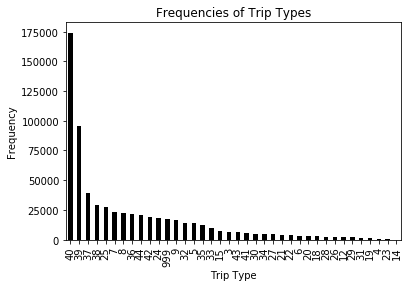

In [5]:
train_df.trip_type.value_counts().plot(kind='bar',color='k')
plt.title('Frequencies of Trip Types')
plt.xlabel('Trip Type')
plt.ylabel('Frequency')
plt.show()

It is important to remember, however, that many records correspond to the same `trip_number`.  This data is therefore at least misleading if not plain wrong, as it is skewed to represent trip types that include many different items.  Let's make this plot again, this time using the grouped data.

In [7]:
type_by_visit={}
for visit in train_df.visit_number.unique():
    type_by_visit[visit]=train_df_grouped.get_group(visit).iloc[0,0]

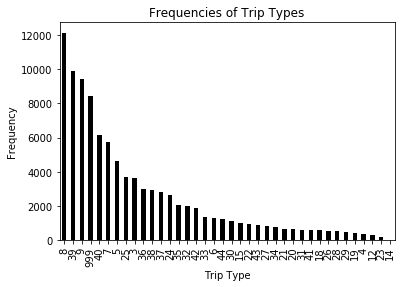

In [8]:
pd.Series(list(type_by_visit.values())).value_counts().plot(kind='bar',color='k')
plt.title('Frequencies of Trip Types')
plt.xlabel('Trip Type')
plt.ylabel('Frequency')
plt.show()

We can similarly look at how often people shop on each day of the week.

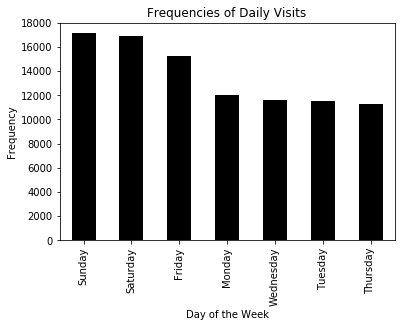

In [9]:
day_by_visit={}
for visit in train_df.visit_number.unique():
    day_by_visit[visit]=train_df_grouped.get_group(visit).iloc[0,2]

pd.Series(list(day_by_visit.values())).value_counts().plot(kind='bar',color='k')
plt.title('Frequencies of Daily Visits')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.show()

In [10]:
# How many total individual items were purchased.
np.sum(train_df.purchase_count.value_counts())

647054

As we saw earlier, 561,489 items were purchased in transactions that included exactly one of that item.  That is, roughly 87% of all purchased items were purchased with a quantity of 1.  Therefore, plotting the frequency of purchase quantities would not be revealing because nearly all bars would have height approximately 0 compared to the bar for quantity 1.  Instead, we use a logarithmic plot.

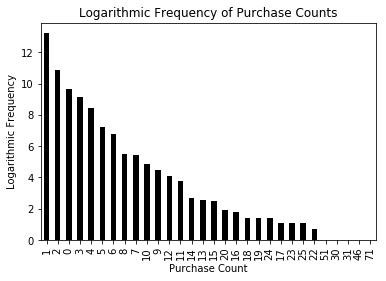

In [11]:
np.log(train_df.purchase_count.value_counts()).plot(kind='bar',color='k')
plt.title('Logarithmic Frequency of Purchase Counts')
plt.xlabel('Purchase Count')
plt.ylabel('Logarithmic Frequency')
plt.show()

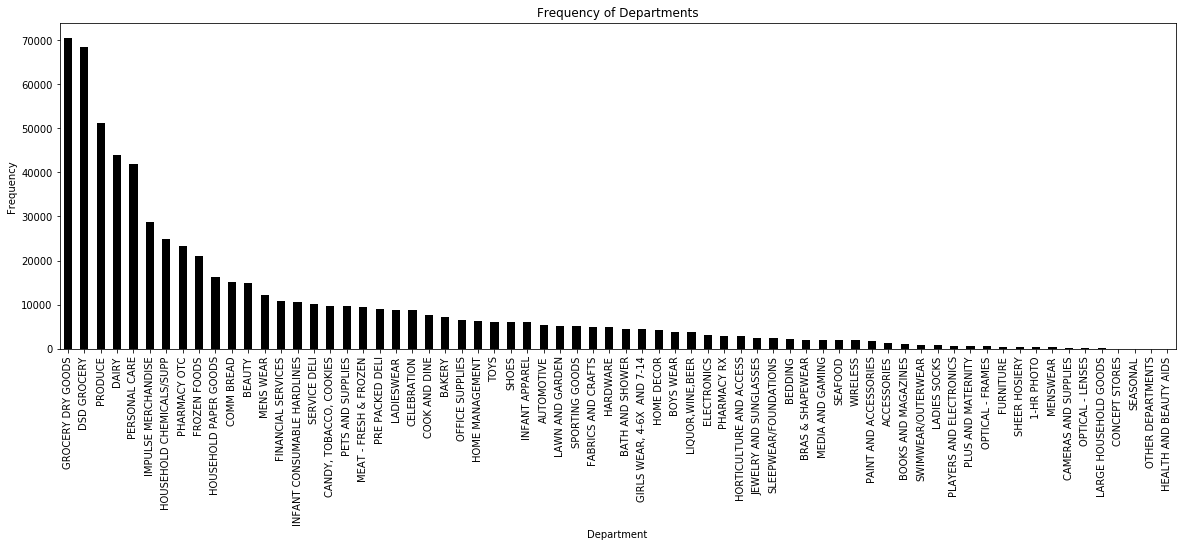

In [13]:
train_df.department_description.value_counts().plot(kind='bar',color='k')
plt.title('Frequency of Departments')
plt.xlabel('Department')
plt.xticks(rotation=90,fontsize=10)
plt.ylabel('Frequency')
plt.rcParams['figure.figsize']=[20,6]
plt.show()

It would not be constructive to create histograms of the `fineline_number` or `upc` because there are far too many distinct values of each for their histograms to have any meaning.  Instead, we can create a CDF of the frequencies of the values for each feature to get a sense of how often each value tends to occur.

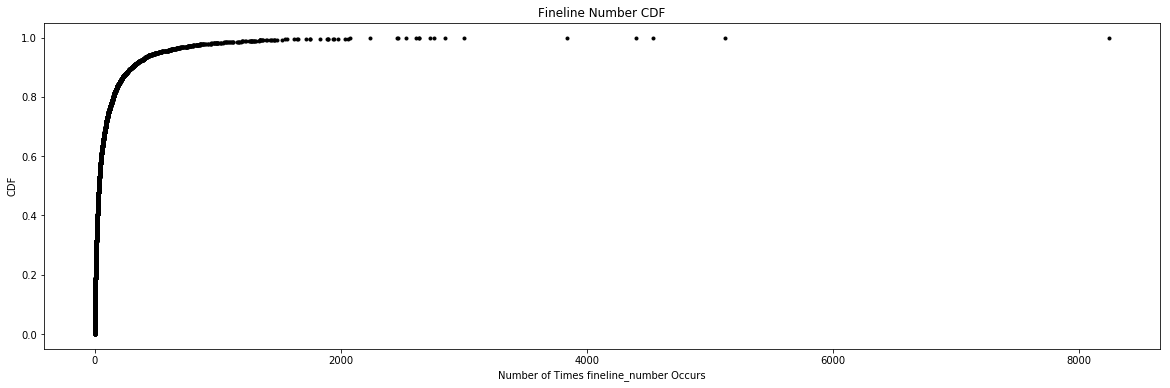

In [14]:
x=np.sort(train_df.fineline_number.value_counts())
y=np.arange(1,len(x)+1)/len(x)
plt.plot(x,y,marker='.',linestyle='none',color='k')
plt.title('Fineline Number CDF')
plt.xlabel('Number of Times fineline_number Occurs')
plt.ylabel('CDF')
plt.show()

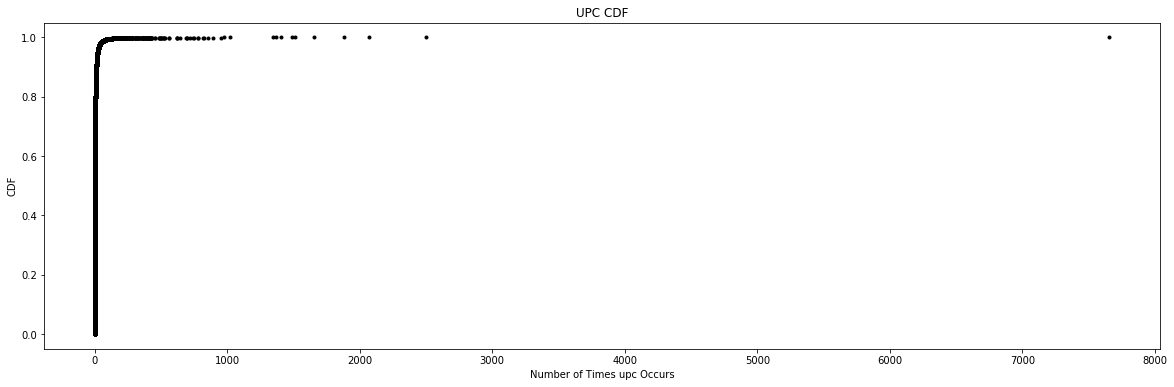

In [15]:
x=np.sort(train_df.upc.value_counts())
y=np.arange(1,len(x)+1)/len(x)
plt.plot(x,y,marker='.',linestyle='none',color='k')
plt.title('UPC CDF')
plt.xlabel('Number of Times upc Occurs')
plt.ylabel('CDF')
plt.show()

It is worth bearing in mind that each of the previous two plots respectively reflect the number of times there was a unique product with a given fineline number or a unique product in a transaction.  They do not, however, take into account how many of said product were purchased or returned.  Different plots could be made to reflect this information by multiplying the values by the scan count before counting occurances.

Lastly, we can look at the CDF of how many unique items each customer purchased.  A similar graph could be made showing the total number of items purchased per transaction, but we will not delve into that feature engineering.

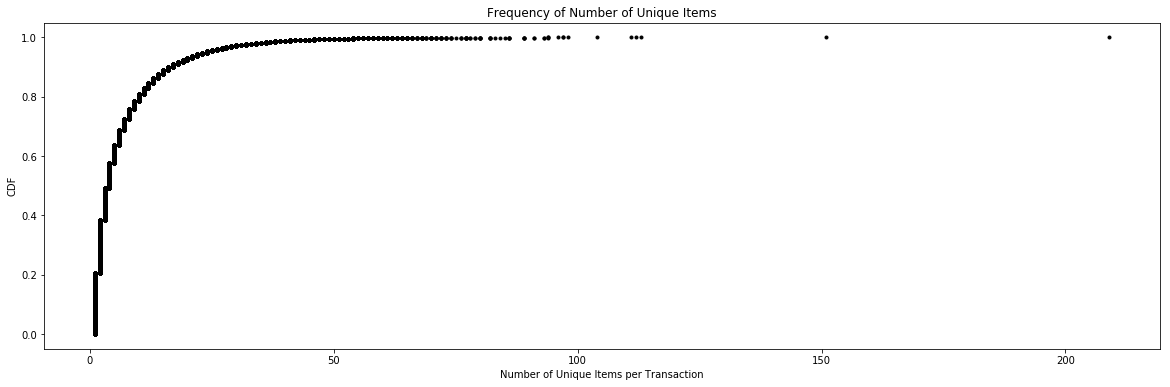

In [16]:
x=np.sort(train_df.visit_number.value_counts())
y=np.arange(1,len(x)+1)/len(x)
plt.plot(x,y,marker='.',linestyle='none',color='k')
plt.title('Frequency of Number of Unique Items')
plt.xlabel('Number of Unique Items per Transaction')
plt.ylabel('CDF')
plt.show()

## A Hierarchical Structure?

It is worth wondering whether there is a hierarchical structure to the features of the data.  That is, does a given `upc` always come from a unique `fineline_number`?  Does a given `fineline_number` always come from a unique `department_description`?  If this were the case, much of the data would be redundant on some level, or at least correlated.  There were also likely be better methods to attack the machine learning phase later in this project that utilize this additional information.  We will now explore this.

In [17]:
# Count the number of departments for each upc, then subtract off the number of upcs.
sum=0
for item in train_df.upc.unique():
    sum=sum+train_df[train_df.upc==item].iloc[:,4].nunique()
sum=sum-len(train_df.upc.unique())
print(sum)

-1


Since we know a upc is never missing a department, the only way the above sum could be -1 would be for each upc to come from exactly 1 department, so each upc contributes a count of 1.  We get `sum=-1` instead of `sum=0` because `item=Nan` did not contribute to the department count yet was subtracted off.

In [18]:
# Print the upcs that do not come from a single fineline
# as well as how many finelines they do come from.
for item in train_df.upc.unique():
    nnunique=train_df[train_df.upc==item].iloc[:,5].nunique()
    if nnunique!=1:
        print(item, nnunique)

nan 0
84223400193.0 2
4600043151.0 2
63592814138.0 2
5527084776.0 2
83082700100.0 2
38137116142.0 2
1864315953.0 2
888852883.0 2
63592822140.0 2
81809400415.0 2
81809400390.0 2
2833251313.0 2
82179622349.0 2


This perfect correspondence does not exist between upcs and finelines.  Instead, there are 13 upcs that comes from one of two finelines.

In [19]:
# Compute how many finelines do not come from a single department
sum=0
for item in train_df.fineline_number.unique():
    if train_df[train_df.fineline_number==item].iloc[:,4].nunique()!=1:
        sum=sum+1
print(sum)

2501


Recall that there were 5,195 finelines, so nearly half of all finelines come from multiple departments.  This phenomonon could be attributed to the fact that many of the departments seem similar.

We could also try analyzing these relationships from the top down by seeing how many of each more specific category a more general category has.

In [20]:
# How many fine lines each department has
for item in train_df.department_description.unique():
    print(item, train_df[train_df.department_description==item].iloc[:,5].nunique())

FINANCIAL SERVICES 26
SHOES 478
PERSONAL CARE 303
PAINT AND ACCESSORIES 127
DSD GROCERY 359
MEAT - FRESH & FROZEN 154
DAIRY 108
PETS AND SUPPLIES 211
HOUSEHOLD CHEMICALS/SUPP 196
nan 0
IMPULSE MERCHANDISE 111
PRODUCE 504
CANDY, TOBACCO, COOKIES 72
GROCERY DRY GOODS 404
BOYS WEAR 172
FABRICS AND CRAFTS 341
JEWELRY AND SUNGLASSES 218
MENS WEAR 399
ACCESSORIES 84
HOME MANAGEMENT 183
FROZEN FOODS 95
SERVICE DELI 81
INFANT CONSUMABLE HARDLINES 188
PRE PACKED DELI 45
COOK AND DINE 307
PHARMACY OTC 462
LADIESWEAR 258
COMM BREAD 51
BAKERY 94
HOUSEHOLD PAPER GOODS 114
CELEBRATION 167
HARDWARE 313
BEAUTY 176
AUTOMOTIVE 247
BOOKS AND MAGAZINES 76
SEAFOOD 37
OFFICE SUPPLIES 288
LAWN AND GARDEN 260
SHEER HOSIERY 22
WIRELESS 120
BEDDING 183
BATH AND SHOWER 80
HORTICULTURE AND ACCESS 167
HOME DECOR 191
TOYS 282
INFANT APPAREL 185
LADIES SOCKS 106
PLUS AND MATERNITY 62
ELECTRONICS 169
GIRLS WEAR, 4-6X  AND 7-14 208
BRAS & SHAPEWEAR 57
LIQUOR,WINE,BEER 50
SLEEPWEAR/FOUNDATIONS 125
CAMERAS AND SUPPLIES 

In [22]:
# And similarly how many items each department has
for item in train_df.department_description.unique():
    print(item, train_df[train_df.department_description==item].iloc[:,3].nunique())

FINANCIAL SERVICES 110
SHOES 2608
PERSONAL CARE 4704
PAINT AND ACCESSORIES 633
DSD GROCERY 3353
MEAT - FRESH & FROZEN 454
DAIRY 1568
PETS AND SUPPLIES 2108
HOUSEHOLD CHEMICALS/SUPP 1911
nan 0
IMPULSE MERCHANDISE 1715
PRODUCE 1037
CANDY, TOBACCO, COOKIES 951
GROCERY DRY GOODS 7577
BOYS WEAR 2148
FABRICS AND CRAFTS 2361
JEWELRY AND SUNGLASSES 1666
MENS WEAR 5563
ACCESSORIES 525
HOME MANAGEMENT 1224
FROZEN FOODS 2354
SERVICE DELI 493
INFANT CONSUMABLE HARDLINES 1660
PRE PACKED DELI 480
COOK AND DINE 2009
PHARMACY OTC 3970
LADIESWEAR 5054
COMM BREAD 582
BAKERY 516
HOUSEHOLD PAPER GOODS 557
CELEBRATION 3279
HARDWARE 1790
BEAUTY 4244
AUTOMOTIVE 1634
BOOKS AND MAGAZINES 398
SEAFOOD 156
OFFICE SUPPLIES 1562
LAWN AND GARDEN 1271
SHEER HOSIERY 219
WIRELESS 481
BEDDING 829
BATH AND SHOWER 1038
HORTICULTURE AND ACCESS 526
HOME DECOR 1801
TOYS 2353
INFANT APPAREL 3341
LADIES SOCKS 470
PLUS AND MATERNITY 436
ELECTRONICS 955
GIRLS WEAR, 4-6X  AND 7-14 2948
BRAS & SHAPEWEAR 1487
LIQUOR,WINE,BEER 554
S

In [25]:
# There are too many finelines to compute statistics for each individually,
# so compute overall statistics for items in regard to finelnes
array=[]
for item in train_df.fineline_number.unique():
    array.append(train_df[train_df.fineline_number==item].iloc[:,3].nunique())
print(np.mean(array),np.median(array),np.max(array),np.std(array))

18.808121632024633 9.0 528 26.620402385850404


Let's return to the case of missing values and see if there is any structure there.

In [31]:
# Which departments have missing values when upc and fineline are missing?
nan_upc=train_df[train_df.upc.isnull()]
non_nan_department=nan_upc[~nan_upc.department_description.isnull()]
print(non_nan_department.department_description.unique())
print(len(nan_upc))
print(len(non_nan_department))

[PHARMACY RX]
Categories (1, object): [PHARMACY RX]
4129
2768


It turns out that PHARMACY RX is the only department that ever has a missing upc/fineline.  This happens 2,768 times.  The remaining 1,361 times that upc/fineline is missing, the department is also missing.

## Summary

Note that throughout this notebook, we have solely made use of the `train_df` dataset and have not touched the `test_df`.  However, all of the above computations could be repeated with the `test_df` (except for the distribution of trip types plot since that data is unknown).  Doing this and comparing the two is a good way to ensure that both datasets come from a similar population distribution.

Some trip types are far more common than others.  On the one hand, this means there is far more data about them.  They are less susceptible to random meaningless patterns in the data and should be easily predictable.  On the other hand, only 35 customers had `trip_type`=14, so predicting that class highly dependent on those few transactions.

As seen in Data_Wrangling.ipynb, there are a few missing values for `upc`, `fineline_number`, and `department_description`.  However, there is a structure to this: `upc` is `NaN` if and only if `fineline_number` is `NaN`.  Further, `department_description` being `NaN` is a subset of the previous scenario.  Otherwise, typically `department_description`=`PHARMACY RX` when the other two are missing values.

We could then ask whether this structure between `upc`, `fineline_number`, and `department_description` generalizes to the whole dataset.  The answer to that is "no."  While each individual upc do come from a unique department, a few of the upcs come from multiple finelines.  Furthermore, nearly half of the finelines are cross-listed under multiple departments.  There is one department called `MENS WEAR` and another called `MENSWEAR`, so the way departments were defined was not perfect.

Despite the flaws in the dataset, it appears to be robust enough to form a good predictive model in later steps.